In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
import keras.models as M
import keras.layers as L
import keras.backend as K
from keras.layers import Dense, Activation, Flatten
dataset = pd.read_csv('creditcard.csv')

In [0]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [0]:
data = dataset.iloc[0:284807,:]
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
X = data.iloc[:,1:30]
y = data['Class']
over = SMOTE(sampling_strategy=0.1, k_neighbors=10)
under = RandomUnderSampler(sampling_strategy=0.5)
X,y = over.fit_resample(X,y)
X,y = under.fit_resample(X,y)
print(X.shape,y.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(85293, 29) (85293,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import KFold
X = data.iloc[:,1:30]
y = data['Class']
kf = KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
K.clear_session()
model = M.Sequential()
#Входной слой
model.add(layers.Dense(128, activation = "relu", input_shape=[29]))
#Обрабатывающие слои
model.add(layers.Dropout(0.5, noise_shape=None, seed=None))
model.add(L.Dense(output_dim=128, activation='relu'))
#Выходной слой
model.add(layers.Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys


In [0]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [0]:
results = model.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 300,
 validation_data = (X_test, y_test)
)

Train on 227846 samples, validate on 56961 samples
Epoch 1/5
227846/227846 [==============================] - 3s 12us/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 2/5
227846/227846 [==============================] - 3s 12us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 3/5
227846/227846 [==============================] - 3s 12us/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 4/5
227846/227846 [==============================] - 3s 12us/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 5/5
227846/227846 [==============================] - 3s 12us/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0060 - val_accuracy: 0.9991


In [0]:
model.summary()
print(np.mean(results.history["val_accuracy"]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3840      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 20,481
Trainable params: 20,481
Non-trainable params: 0
_________________________________________________________________
0.999269676208496


0.9546659089604925


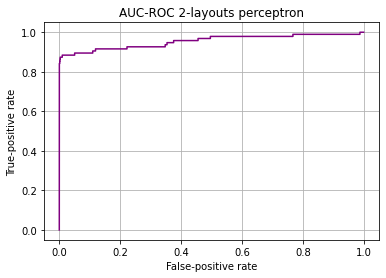

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
predicts = model.predict(
 X_test,
 batch_size = 32,
)
from sklearn import metrics
plt.xlabel('False-positive rate')
plt.ylabel('True-positive rate')
plt.grid()
plt.title('AUC-ROC 2-layouts perceptron')
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicts)
plt.plot(fpr, tpr,color = 'purple')
roc_auc = roc_auc_score(y_test, predicts)
print(roc_auc)